# Plotly maps
- Various map types and overlays are available.
- Open Street Map is open for use without a token.
- Overlays include scatter, lines, densities, etc.
- Choropleths (coloured map sections) can be used as overlays or as separate plots when a GeoJSON formated dictionary of map polygons are available.

In [1]:
# The following renders plotly graphs in Jupyter Notebook, Jupyter Lab and VS Code formats
import plotly.io as pio
pio.renderers.default = "notebook+plotly_mimetype"

## Map
- Various maps with user defined overlays are available, e.g., _scatter\_map_.
- From Plotly version 5.24, Mapbox-es are deprecated, e.g., _scatter\_mapbox_.
    - Writer has, as of 16. November 2024, not made the switch yet.
    - In most cases, switching between map and mapbox does not require other code changes.

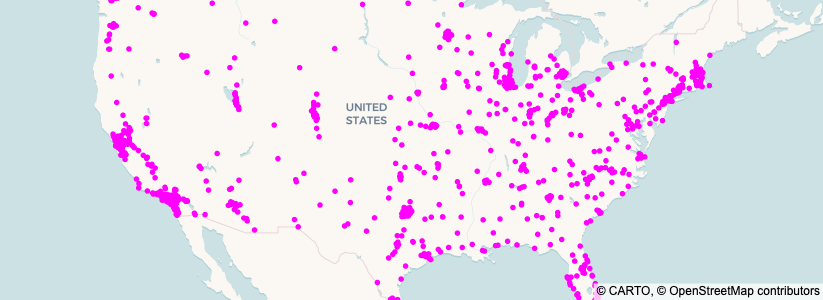

In [3]:
import plotly.express as px
import pandas as pd

us_cities = pd.read_csv(
    "https://raw.githubusercontent.com/plotly/datasets/master/us-cities-top-1k.csv"
)

fig = px.scatter_map(
    us_cities,
    lat="lat",
    lon="lon",
    hover_name="City",
    hover_data=["State", "Population"],
    color_discrete_sequence=["fuchsia"],
    zoom=3,
    height=300,
    width=600,
)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
fig.update_layout(mapbox_bounds={"west": -180, "east": -50, "south": 20, "north": 90})
fig

### A local example from Ås

In [4]:
import pandas as pd

# Local restaurants and cafes
restaurants = pd.read_csv('../../data/restaurants.csv')
restaurants

,name,lat,lon,type
0,Sushiko Ås,59.664773,10.789674,Restaurant
1,Charlie's Diner,59.664663,10.788735,Restaurant
2,Jojo's Pizza,59.665496,10.795366,Restaurant
3,Desi Zaiqa,59.664281,10.792276,Restaurant
4,Babylon Pizza,59.663602,10.792977,Restaurant
5,NT kiosk,59.663743,10.793237,Kiosk
6,Aas Bistro,59.663465,10.793558,Restaurant
7,Whytes Coffee,59.664686,10.790830,Café
8,Station kiosk Ås,59.663324,10.794335,Café


In [7]:
fig_restaurants = px.scatter_map(
    restaurants,
    lat="lat",
    lon="lon",
    hover_name="name",
    hover_data=["type","lat","lon"],
    color_discrete_sequence=["green"],
    zoom=14,
    height=600,
    width=700,
)
fig_restaurants.update_layout(mapbox_style="open-street-map")
fig_restaurants.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})
#fig_restaurants.update_traces(cluster=dict(enabled=True)) # Group restaurants when zooming out
fig_restaurants

In [8]:
print(fig_restaurants)

Figure({
    'data': [{'customdata': array([['Restaurant', 59.6647728, 10.7896737],
                                   ['Restaurant', 59.6646628, 10.7887347],
                                   ['Restaurant', 59.6654962, 10.7953659],
                                   ['Restaurant', 59.6642813, 10.7922755],
                                   ['Restaurant', 59.6636019, 10.7929767],
                                   ['Kiosk', 59.6637434, 10.7932373],
                                   ['Restaurant', 59.663465, 10.7935577],
                                   ['Café', 59.6646862, 10.7908304],
                                   ['Café', 59.663324, 10.7943351]], dtype=object),
              'hovertemplate': ('<b>%{hovertext}</b><br><br>lat' ... '{customdata[0]}<extra></extra>'),
              'hovertext': array(['Sushiko Ås', "Charlie's Diner", "Jojo's Pizza", 'Desi Zaiqa',
                                  'Babylon Pizza', 'NT kiosk', 'Aas Bistro', 'Whytes Coffee',
                        

## Interacting with a Plotly map in Streamlit
### Selecting points

```python
import pandas as pd
import plotly.express as px
import streamlit as st

# Local restaurants and cafes
restaurants = pd.read_csv('../D2Dbook/data/restaurants.csv')

fig_restaurants = px.scatter_map(
    restaurants,
    lat="lat",
    lon="lon",
    hover_name="name",
    hover_data=["type","lat","lon"],
    color_discrete_sequence=["green"],
    # Size of sequence
    size=[10]*len(restaurants),
    size_max=8,
    zoom=14,
    height=600,
    width=700,
)
fig_restaurants.update_layout(mapbox_style="open-street-map")
fig_restaurants.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

# If "restaurant" is not in the session state, initialize it
st.title("Local Restaurants and Cafes")

st.plotly_chart(fig_restaurants, key = "restaurant", on_select="rerun", use_container_width=False)
st.subheader("")
st.subheader("Clicked Restaurant Info")
if st.session_state["restaurant"]:
    st.json(st.session_state["restaurant"])

In [2]:
# !streamlit run "/Users/kristian/Documents/GitHub/IND320/streamlit/map.py"

## Choropleths
- A pure choropleth can be plotted using a GeoJSON file.
- In addition a DataFrame containing the map region properties to use for colouring and hover information is needed.

In [ ]:
# Choropleth map of US counties with unemployment rate
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

import plotly.express as px

fig_chl = px.choropleth(df, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'unemp':'unemployment rate'}
                          )
fig_chl.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig_chl

In [ ]:
#counties

### Choropleth with map
- The map version of choropleth plotting is more robust to choropleth specifications.
- Examples of GeoJSON sources: https://norgeskart.no/json/norge/ and https://temakart.nve.no/tema/nettanlegg.

In [ ]:
custom_scale = [
    (0.0, "rgba(68,1,84,0.6)"),
    (0.5, "rgba(58,82,139,0.6)"),
    (1.0, "rgba(33,145,140,0.6)")
]

fig_chl = px.choropleth_map(
    df,
    geojson=counties,
    locations="fips",
    featureidkey="id",
    color="unemp",
    color_continuous_scale=custom_scale,
    range_color=(2, 8),
    map_style="open-street-map",
    zoom=3,
    center={"lat": 40.0, "lon": -95.0},
)
fig_chl.update_traces(marker_line=dict(width=0.5, color="white"))
fig_chl.update_layout(margin=dict(r=0, t=0, l=0, b=0))
fig_chl

### Choropleth and pin
- Using Folium, one can extract latitudes and longitudes from choropleth overlayed maps.
- If the GeoJSON is large, expect some latency when clicking.  
  
![Choropleth_pin.png](../../images/Choropleth_pin.png)

In [3]:
# !streamlit run "/Users/kristian/Documents/GitHub/IND320/streamlit/map_folium_choropleth.py"

In [ ]:
# Gapminder dataset as a map
import plotly.express as px
df = px.data.gapminder()
fig_chl2 = px.choropleth(df, locations="iso_alpha", color="lifeExp", hover_name="country", animation_frame="year", range_color=[20,80])
fig_chl2

```{seealso} 
:class: tip

## Resources
- [Plotly scatter map](https://plotly.com/python/tile-scatter-maps/)
- [Plotly scatter mapbox](https://plotly.com/python/scattermapbox/)
- [Plotly choropleths](https://plotly.com/python/choropleth-maps/)
- [Streamsync demos](https://github.com/jreyesr/streamsync-demos)
```

In [ ]:
# Dummy cell to ensure Plotly graphics are shown
import plotly.graph_objects as go
f = go.FigureWidget([go.Scatter(x=[1,1], y=[1,1], mode='markers')])